# Exhaustive Search for the Quadratic Assignment Problem

In [1]:
##This is an initialization cell. Run this first
import pandas as pd
import numpy as np
from itertools import product
import time
import math
import matplotlib
import matplotlib.pyplot as plt

The functions below are for inputting the csv data (that is in the QAPLIB format) and making the matrices numpy arrays.

In [2]:
def CSVtoNumpyArray(rawdata):
    """
    Input: 
    rawdata = a csv file (insert name as a string)

    Output:
    two numpy matrices in a tuple
    
    Optimised 04/06/2020
    """
    data = pd.read_csv(rawdata)  #Reads the data in as a pandas object
    c = data.columns
    column = int(c[0])
    final_data1 = data.iloc[:column,:].values  #Sets data into a series of numpy arrays of strings
    final_data2 = data.iloc[column:,:].values  #1 is for the first matrix(loc) and 2 is for the second(flow)
    

    #Forms the matrix as a numpy array (easier to work with) instead of an list of lists of strings
    def string_to_integers(final_data):
        matrix = np.zeros(column)
        for j in range(column):
            string = final_data[j][0]
            string2 = string.split(" ")
            emptyarray = np.array([])
            for i in string2:
                if i != '':
                    emptyarray = np.append(emptyarray,i).astype(int)
            matrix = np.vstack((matrix,emptyarray))
        return matrix[1:]
    return string_to_integers(final_data1),string_to_integers(final_data2)

In [3]:
#small sized matrices(under 10x10) (quick on all methods)
matrix_size_4 = './data/made4.csv'
matrix_size_5 = './data/made5.csv'
matrix_size_6 = './data/made6.csv'
matrix_size_7 = './data/made7.csv'
matrix_size_8 = './data/made8.csv'
matrix_size_9 = './data/made9.csv'

matrixMade = ['./data/made4.csv', 
              './data/made5.csv', 
              './data/made6.csv', 
              './data/made7.csv', 
              './data/made8.csv', 
              './data/made9.csv']


#medium sized matrices(ranging from 10x10 to 30x30) (slow on deterministic methods, fast on heuristics)
matrix_size_10 = './data/tai10a.csv'
matrix_size_11 = './data/made11.csv'
matrix_size_12 = './data/tai12a.csv'
matrix_size_15 = './data/chr15a.csv' 
matrix_size_20 = './data/chr20a.csv'
matrix_size_26 = './data/bur26a.csv'

#large sized matrices(30x30 and bigger)(reasonably slow on the heuristics to a certain degree of accuracy)
matrix_size_40 = './data/tai40a.csv'
matrix_size_60 = './data/tai60.csv'
matrix_size_80 = './data/tai80.csv'
matrix_size_256 = './data/tai256c.csv'

datamatrix = CSVtoNumpyArray(matrix_size_4) # Decide the size of problem to run in the code (clue: 
                                                #the number in the original name is the size)
MatrixLoc = datamatrix[0]
MatrixFlow = datamatrix[1]

Below is the permutation generating function. For medium and large instances it would be wise to run this function to file separately first and then use the results for Exhaustive Search and/or Branch and Bound.

In [4]:
def QAPPermutations(iterable, r=None):
    """
    Input:
    String or numbers separated by a space
    optional= the length that the permutations must be
    
    Output:
    a generator of permutations
    
    Sourced from the itertools library and adjusted to suit this data type
    https://docs.python.org/3.4/library/itertools.html#itertools.permutations 
    """
    
    pool = iterable.split(" ")
    n = len(pool)
    r = n if r is None else r
    for indices in product(range(n), repeat=r):
        if len(set(indices)) == r:
            yield list(pool[i] for i in indices)

In [5]:
def FitnessFunction(MatrixLoc, MatrixFlow, perm):
    """
    Input:
    MatrixLoc: numpy array
    MatrixFlow: numpy array
    perm: numpy array
    
    Output:
    total: int

    """
    #initialization
    length = len(MatrixLoc)
    total = 0
    
    #the sum
    for i in range(length):
        for j in range(length):
            if i!=j:
                total += MatrixLoc[i][j]*MatrixFlow[perm[i]][perm[j]]
    return total         

In [6]:
def ExhaustiveSearch(MatrixLoc, MatrixFlow):
    """
    Input:
    MatrixLoc: numpy array
    MatrixFlow: numpy array
    
    Output:
    bestpermutation: numpy array
    bestcost: int
    
    """
    # Important starting values
    length = len(MatrixLoc)
    thestring = ""
    
    #Generate the permutations
    for i in range(0,length):  #this is making a string of numbers from 0 to the size of the matrix -1
        thestring += str(i) + " "
    thestring = thestring[:-1]
    listofassociations = np.array(list(QAPPermutations(thestring,length))).astype(int) #this was the function we made earlier
    
    #Generate the costs
    listofcosts = np.array([])
    for k in listofassociations:
        z = FitnessFunction(MatrixLoc,MatrixFlow,k)
        listofcosts = np.append(listofcosts,z)
    
    #Find the minimum
    bestcost = np.min(listofcosts)    
    bestpermutation = listofassociations[np.argmin(listofcosts)]
    
    return bestcost, bestpermutation

In [7]:
ExhaustiveSearch(MatrixLoc, MatrixFlow)

(790.0, array([2, 3, 0, 1]))

In [8]:
# temp....
results = [ExhaustiveSearch(CSVtoNumpyArray(file)[0], CSVtoNumpyArray(file)[1]) for file in matrixMade]

In [9]:
bestCost = []
totTimes = []
for file in matrixMade:
    loc, flow = CSVtoNumpyArray(file)
    start     = time.time()
    best, _   = ExhaustiveSearch(loc, flow)
    end       = time.time()
    bestCost.append(best)
    totTimes.append(end - start)
    print("Time taken for case: {} is {} seconds".format(file.split("/")[-1], round(end - start, 4)))

Time taken for case: made4.csv is 0.002 seconds
Time taken for case: made5.csv is 0.008 seconds
Time taken for case: made6.csv is 0.1099 seconds
Time taken for case: made7.csv is 0.9344 seconds
Time taken for case: made8.csv is 16.8575 seconds
Time taken for case: made9.csv is 714.6147 seconds


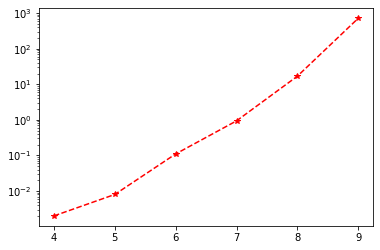

In [10]:
plt.figure()
x = np.arange(4, 10)
plt.plot(x, totTimes, 'r*--')
plt.yscale('log')
plt.show()

In [ ]:
#Select the outputs to print to file along with their running times
#names = ["made4.csv","made5.csv","made6.csv","made7.csv","made8.csv","made9.csv","tai10a.csv","made11.csv"]
def ExhaustiveResults(names):
    file = open("ExhaustiveSearch - out.csv","w")
    for q in range(len(names)):
        datamatrix = CSVtoNumpyArray(names[q]) # Decide the size of problem to run in the code
        MatrixLoc = datamatrix[0]
        MatrixFlow = datamatrix[1]
        sol = ExhaustiveSearch(MatrixLoc, MatrixFlow)
        print(names[q] + " has been solved by ExhaustiveSearch")
        file.write( str(sol)+ "\n")
    file.close()

    return True

In [ ]:
ExhaustiveResults(names)